# 1. Load dataset

#### In this notebook, we will use a student exams results dataset (exams.csv). It is a collection of exam scores and a binary value indicating whether the student has passed the course. We will need to read the data from data file (exams.csv). It contains three columns. First two columns (exam_1, exam_2) are exam scores of a student and the third value indicates whether the student has passed the course or not (1 or 0).
#### It is recommended to normalize the data at this stage. Gradient descent algorithm performs much better when the data is normalized (min-max normalization will be employed).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
norm_df = (df - df.min())/(df.max() - df.min())

norm_df['admitted'] = norm_df['admitted'].astype('i')

In [4]:
norm_df.shape

(100, 3)

# 2. Visualize

#### Plot a graph of first exam score vs second exam score. Admitted student points should be green and failed student points should be red.

In [5]:
colors = {0:'red', 1:'green'}

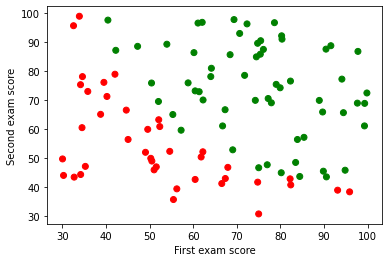

In [6]:
fig, ax = plt.subplots()

ax.scatter(df['exam_1'], df['exam_2'], c=df['admitted'].map(colors))
ax.set_xlabel('First exam score')
ax.set_ylabel('Second exam score')

plt.show()

# 3. Logistic Regression

#### Implement Logistic Regression from scratch (using numpy)
a) Implement a function which returns sigmoid of a value given the value.

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

b) Implement the following cost function.
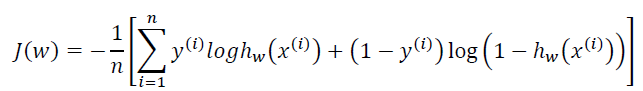

In [8]:
norm_df['bias_column'] = np.ones(100).reshape(100, 1)

In [9]:
X = norm_df[['bias_column', 'exam_1', 'exam_2']]
y = norm_df['admitted']
W = [1, 2, 3]

alpha = 0.3
iterations = 10000

c) Write code that finds the best fit parameters for logistic regression using gradient descent from scratch. In addition, we will save the cost value at each iteration for plottting.
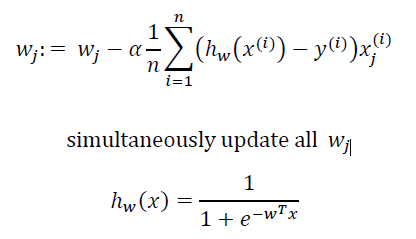

In [10]:
def gradient_descent(X: np.ndarray, y: np.ndarray, W: np.ndarray, alpha: float, iterations: int):
    loss_history =[]
    
    for i in range(iterations):
        hypothesis = sigmoid(np.dot(X, W))
    
        cost = -1/len(y) * np.sum((y * np.log(hypothesis)) + ((1 - y)*np.log(1 - hypothesis)))
    
        W -= alpha/len(y) * np.dot(X.T, (hypothesis - y))
        
        loss_history.append(cost)
    
    return W , loss_history

In [11]:
updated_weigths, costs = gradient_descent(X, y, W, alpha, iterations)

d) Plot the graph of the cost function and describe how it changes over iterations

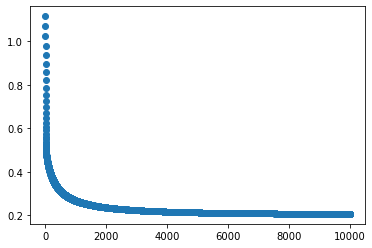

In [12]:
plt.plot(range(iterations), costs, 'o')

In [13]:
updated_weigths

array([-11.03301415,  12.45848157,  11.84380695])

e) Plot points of the first exam score vs the second exam score. Admitted student points should be green and failed student points should be red. (same as Visualization part). And plot the decision boundary using the parameters found by gradient descent on the same graph.

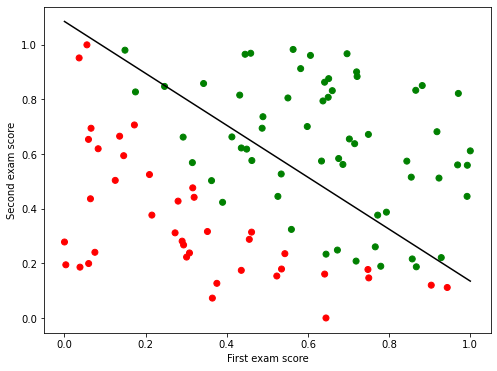

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.scatter(norm_df['exam_1'], norm_df['exam_2'], c=norm_df['admitted'].map(colors))
ax.set_xlabel('First exam score')
ax.set_ylabel('Second exam score')

a = -updated_weigths[2]/updated_weigths[1]

xx = np.linspace(0, 1)
yy = a * xx - (updated_weigths[0]) / updated_weigths[1] + 0.2

plt.plot(xx, yy, 'k-')

plt.show()

# 4. Logistic Regression using library

#### Use a library to perform logistic regression on the data.

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(X[['exam_1', 'exam_2']], y)

In [16]:
model.score(X[['exam_1', 'exam_2']], y)

0.93